### Install library

In [2]:
from langchain.document_loaders.csv_loader import CSVLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.embeddings import HuggingFaceHubEmbeddings
from langchain.vectorstores import FAISS
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationalRetrievalChain
from langchain.chains import LLMChain
from langchain.chains import RetrievalQA
from sentence_transformers import SentenceTransformer
from langchain_community.vectorstores import Chroma
from langchain_community.vectorstores import FAISS
from langchain.storage import InMemoryStore
from langchain.prompts import PromptTemplate
import pandas as pd
import torch
import sys

c:\Users\wasan\anaconda3\anconda4\envs\LLM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Upload data

In [ ]:
# Path DB
DB_FAISS_PATH = "vectorstore/db_faiss"

In [44]:
loader = CSVLoader(
    file_path=r'C:\Users\wasan\OneDrive\Desktop\LLM_CSV\Data\2019.csv' ,
    csv_args={
        "delimiter": ",",
        "quotechar": '"',
    },
)

data = loader.load()
print(data)

[Document(page_content='Overall rank: 1\nCountry or region: Finland\nScore: 7.769\nGDP per capita: 1.340\nSocial support: 1.587\nHealthy life expectancy: 0.986\nFreedom to make life choices: 0.596\nGenerosity: 0.153\nPerceptions of corruption: 0.393', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 0}), Document(page_content='Overall rank: 2\nCountry or region: Denmark\nScore: 7.600\nGDP per capita: 1.383\nSocial support: 1.573\nHealthy life expectancy: 0.996\nFreedom to make life choices: 0.592\nGenerosity: 0.252\nPerceptions of corruption: 0.410', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 1}), Document(page_content='Overall rank: 3\nCountry or region: Norway\nScore: 7.554\nGDP per capita: 1.488\nSocial support: 1.582\nHealthy life expectancy: 1.028\nFreedom to make life choices: 0.603\nGenerosity: 0.271\nPerceptions of corruption: 0.341', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Deskto

In [40]:
df=pd.read_csv(r'C:\Users\wasan\OneDrive\Desktop\LLM_CSV\Data\2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [37]:
print(data[5].page_content)

Overall rank: 6
Country or region: Switzerland
Score: 7.480
GDP per capita: 1.452
Social support: 1.526
Healthy life expectancy: 1.052
Freedom to make life choices: 0.572
Generosity: 0.263
Perceptions of corruption: 0.343


### Split data

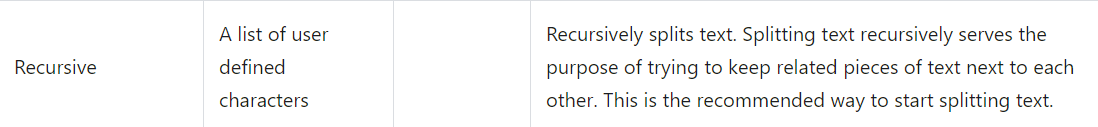

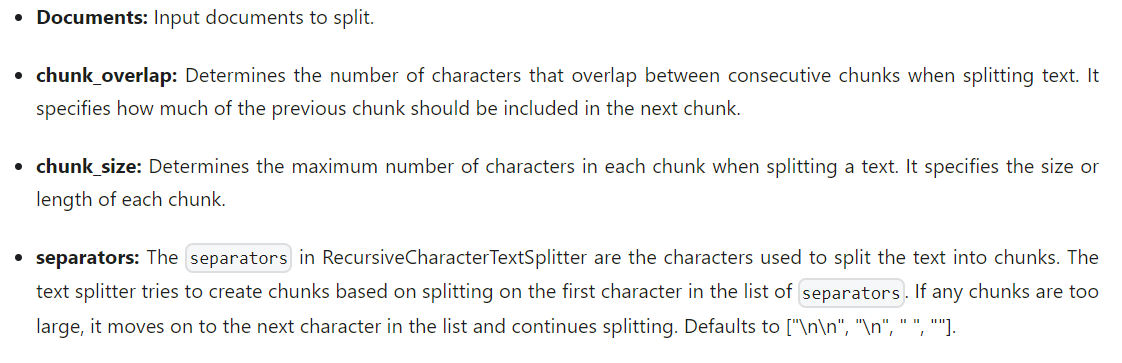

Overlap --> the maximum overlap between chunks. It can be nice to have some overlap to maintain some continuity between chunks 


In [100]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=200)#64 #overlap -->  specifies how much overlap there should be between chunks. This is often helpful to make sure that the text isn't split weirdly
text_chunks= text_splitter.split_documents(data)
#chunk_size=500
text_chunks


[Document(page_content='Overall rank: 1\nCountry or region: Finland\nScore: 7.769\nGDP per capita: 1.340\nSocial support: 1.587\nHealthy life expectancy: 0.986\nFreedom to make life choices: 0.596\nGenerosity: 0.153\nPerceptions of corruption: 0.393', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 0}),
 Document(page_content='Overall rank: 2\nCountry or region: Denmark\nScore: 7.600\nGDP per capita: 1.383\nSocial support: 1.573\nHealthy life expectancy: 0.996\nFreedom to make life choices: 0.592\nGenerosity: 0.252\nPerceptions of corruption: 0.410', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 1}),
 Document(page_content='Overall rank: 3\nCountry or region: Norway\nScore: 7.554\nGDP per capita: 1.488\nSocial support: 1.582\nHealthy life expectancy: 1.028\nFreedom to make life choices: 0.603\nGenerosity: 0.271\nPerceptions of corruption: 0.341', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desk

In [8]:
text_chunks[0].page_content

'Overall rank: 1\nCountry or region: Finland\nScore: 7.769\nGDP per capita: 1.340\nSocial support: 1.587\nHealthy life expectancy: 0.986\nFreedom to make life choices: 0.596\nGenerosity: 0.153\nPerceptions of corruption: 0.393'

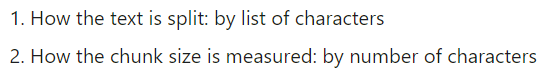

### Embeddings

In [3]:
embeddings = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', model_kwargs={'device': 'cpu'})

c:\Users\wasan\anaconda3\anconda4\envs\LLM\lib\site-packages\bitsandbytes\cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


In [47]:

# Save the entire embeddings object locally
local_embeddings_path = r'C:\Users\OneDrive\Desktop\LLM_CSV/embeddings_object_2024.pth'

#torch.save(embeddings, local_embeddings_path)


# Load the embeddings object from the local file
loaded_embeddings = torch.load(local_embeddings_path)

c:\Users\wasan\anaconda3\anconda4\envs\LLM\lib\site-packages\bitsandbytes\cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


In [86]:
loaded_embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={'device': 'cpu'}, encode_kwargs={}, multi_process=False, show_progress=False)

### Model & Retrieval

In [107]:

db = FAISS.from_documents(text_chunks, loaded_embeddings)
db.save_local(DB_FAISS_PATH)

In [ ]:
#  If you need a tool for efficient similarity search and clustering of dense vectors and are prepared to build additional functionality around it, FAISS could be suitable

In [106]:
llm = CTransformers(model=r"C:\Users\OneDrive\Desktop\LLM_CSV\models\llama-2-7b-chat.ggmlv3.q4_0.bin",
                    model_type="llama",
                    max_new_tokens=1256,
                    temperature=0.0)

#### similarity (not needed)

In [9]:
query = "GDP per capita for Qatar "
docs = db.similarity_search(query)
docs

[Document(page_content='Overall rank: 29\nCountry or region: Qatar\nScore: 6.374\nGDP per capita: 1.684\nSocial support: 1.313\nHealthy life expectancy: 0.871\nFreedom to make life choices: 0.555\nGenerosity: 0.220', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 28}),
 Document(page_content='Overall rank: 91\nCountry or region: Lebanon\nScore: 5.197\nGDP per capita: 0.987\nSocial support: 1.224\nHealthy life expectancy: 0.815\nFreedom to make life choices: 0.216\nGenerosity: 0.166', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 90}),
 Document(page_content='Overall rank: 21\nCountry or region: United Arab Emirates\nScore: 6.825\nGDP per capita: 1.503\nSocial support: 1.310\nHealthy life expectancy: 0.825\nFreedom to make life choices: 0.598\nGenerosity: 0.262', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 20}),
 Document(page_content='Overall rank: 151

In [10]:
docs_and_scores = db.similarity_search_with_score(query)
docs_and_scores[0]

(Document(page_content='Overall rank: 29\nCountry or region: Qatar\nScore: 6.374\nGDP per capita: 1.684\nSocial support: 1.313\nHealthy life expectancy: 0.871\nFreedom to make life choices: 0.555\nGenerosity: 0.220', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 28}),
 0.5101043)

In [11]:
embedding_vector = embeddings.embed_query(query)
docs_and_scores = db.similarity_search_by_vector(embedding_vector)
docs_and_scores

[Document(page_content='Overall rank: 29\nCountry or region: Qatar\nScore: 6.374\nGDP per capita: 1.684\nSocial support: 1.313\nHealthy life expectancy: 0.871\nFreedom to make life choices: 0.555\nGenerosity: 0.220', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 28}),
 Document(page_content='Overall rank: 91\nCountry or region: Lebanon\nScore: 5.197\nGDP per capita: 0.987\nSocial support: 1.224\nHealthy life expectancy: 0.815\nFreedom to make life choices: 0.216\nGenerosity: 0.166', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 90}),
 Document(page_content='Overall rank: 21\nCountry or region: United Arab Emirates\nScore: 6.825\nGDP per capita: 1.503\nSocial support: 1.310\nHealthy life expectancy: 0.825\nFreedom to make life choices: 0.598\nGenerosity: 0.262', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 20}),
 Document(page_content='Overall rank: 151

In [12]:
print(docs[0].page_content)

Overall rank: 29
Country or region: Qatar
Score: 6.374
GDP per capita: 1.684
Social support: 1.313
Healthy life expectancy: 0.871
Freedom to make life choices: 0.555
Generosity: 0.220


In [13]:
retriever = db.as_retriever()
docs = retriever.invoke(query)
docs

[Document(page_content='Overall rank: 29\nCountry or region: Qatar\nScore: 6.374\nGDP per capita: 1.684\nSocial support: 1.313\nHealthy life expectancy: 0.871\nFreedom to make life choices: 0.555\nGenerosity: 0.220', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 28}),
 Document(page_content='Overall rank: 91\nCountry or region: Lebanon\nScore: 5.197\nGDP per capita: 0.987\nSocial support: 1.224\nHealthy life expectancy: 0.815\nFreedom to make life choices: 0.216\nGenerosity: 0.166', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 90}),
 Document(page_content='Overall rank: 21\nCountry or region: United Arab Emirates\nScore: 6.825\nGDP per capita: 1.503\nSocial support: 1.310\nHealthy life expectancy: 0.825\nFreedom to make life choices: 0.598\nGenerosity: 0.262', metadata={'source': 'C:\\Users\\wasan\\OneDrive\\Desktop\\LLM_CSV\\Data\\2019.csv', 'row': 20}),
 Document(page_content='Overall rank: 151

In [14]:
print(docs[0].page_content)

Overall rank: 29
Country or region: Qatar
Score: 6.374
GDP per capita: 1.684
Social support: 1.313
Healthy life expectancy: 0.871
Freedom to make life choices: 0.555
Generosity: 0.220


### Result

In [54]:
qa_chain = RetrievalQA.from_chain_type(llm=llm,
                                       retriever=db.as_retriever(),  )

In [33]:
question = "GDP for Qatar?"
result = qa_chain({"query": question})
result["result"]

' The GDP per capita for Qatar is $1.684.'

In [19]:
question= "GDP for Aqaba?"
result = qa_chain({"query": question})
result["result"]

" I don't know the answer to that question, as it is not provided in the given context."

In [112]:
question = "What is the minimum number reported for Finland?"
result = qa_chain({"query": question})
result["result"]

' Based on the information provided, the minimum score for Finland is 7.769 for overall rank.'

In [113]:
question = "What is the minimum number reported for GDP ?"
result = qa_chain({"query": question})
result["result"]

' The minimum reported GDP per capita in the given context is $0.138, which belongs to Niger.'

In [21]:
question = "Healthy life for Finland?"# 0.986
result = qa_chain({"query": question})
result["result"]

' The healthy life expectancy for Finland is 0.986 according to the provided data.'

In [29]:
question = "data for Denmark"
result = qa_chain({"query": question})
result["result"]

' Denmark has a score of 7.600, which ranks it 2nd out of the countries listed. Its GDP per capita is $1.383, and its social support score is 1.573.'

In [23]:
question = "rank of Canada?"
result = qa_chain({"query": question})
result["result"]

' The overall rank of Canada is 9.'

In [32]:
question = "Perceptions for New Zealand"
result = qa_chain({"query": question})
result["result"]

' The perception of corruption in New Zealand is around 0.380, which means that people perceive it as a country with a relatively low level of corruption.'